### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [2]:
date = '2018-11-03_07h18'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'
worker_list = [8,16,32,64]

In [3]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [4]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,cpu_mean,cpu_std
0,12,8,10.277141,0.078733
1,12,16,9.683412,0.512661
2,12,32,11.647175,0.094788
3,12,64,23.556040,15.801055
4,24,8,9.083068,0.082448
5,24,16,9.780790,0.669477
6,24,32,9.600023,0.068038
7,24,64,10.113599,0.177894
8,48,8,9.005339,0.329182
9,48,16,8.472203,0.068970


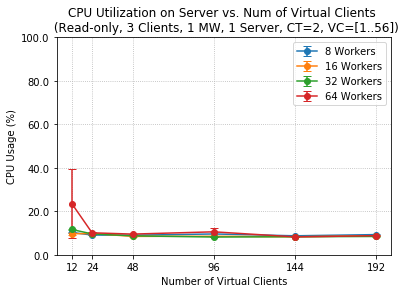

In [5]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [10]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netsend_mean,netsend_std
0,12,8,6.371056e+05,43240.052381
1,12,16,6.612443e+05,8486.568133
2,12,32,6.727288e+05,7622.443716
3,12,64,6.742016e+05,10720.875386
4,24,8,7.681746e+05,3200.123171
5,24,16,9.480874e+05,79459.569818
6,24,32,9.009162e+05,55939.073786
7,24,64,9.285296e+05,22541.774587
8,48,8,7.954940e+05,9964.550616
9,48,16,1.209756e+06,27986.885415


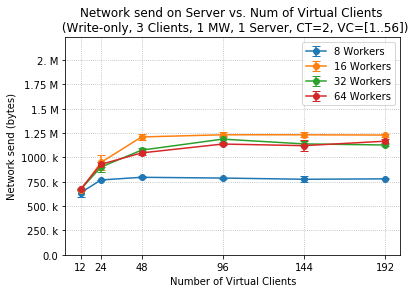

In [11]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Write-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [8]:
# read data into pandas dataframe
file_name = 'dstat_client_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netrecv_mean,netrecv_std
0,12,8,4.448990e+06,19126.792811
1,12,16,4.418254e+06,6524.561331
2,12,32,4.395351e+06,7814.176050
3,12,64,4.335749e+06,163161.222798
4,24,8,4.339023e+06,9404.792750
5,24,16,4.367628e+06,58962.155671
6,24,32,4.350931e+06,39784.775077
7,24,64,4.314681e+06,20151.061966
8,48,8,4.273822e+06,8575.879853
9,48,16,4.267861e+06,5380.607337


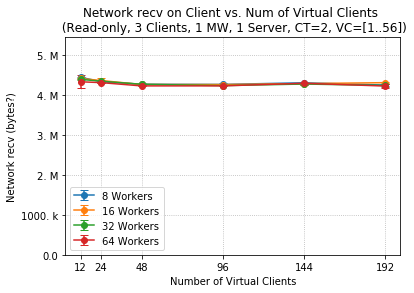

In [9]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)